In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:

df = pd.read_csv('20200124_ews_observations.csv',
                sep=',',low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [4]:
df.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [5]:
#df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [6]:
#df['Month'] = df['ObservationDate'].dt.month

In [7]:
#df = df.set_index(['Month'])

In [8]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [9]:
df['yyyymmdd'] = df['ObservationDate'].dt.strftime('%Y-%m-%d')

In [10]:
df.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score,yyyymmdd
0,29,2019-05-01 13:27:50,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0,2019-05-01
1,30,2019-05-01 15:27:44,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0,2019-05-01
2,31,2019-05-01 15:54:27,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0,2019-05-01
3,32,2019-05-01 16:07:27,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0,2019-05-01
4,33,2019-05-01 17:03:16,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0,2019-05-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        171736 non-null  int64         
 1   ObservationDate  171736 non-null  datetime64[ns]
 2   EwsProcedure     171736 non-null  object        
 3   EWS_Total        171736 non-null  int64         
 4   SBP              160949 non-null  float64       
 5   SBP_Score        160949 non-null  float64       
 6   LOC              171736 non-null  object        
 7   LOC_Score        171736 non-null  int64         
 8   SpO2             171734 non-null  float64       
 9   SpO2_Score       171734 non-null  float64       
 10  Add_O2           171734 non-null  object        
 11  Add_O2_Score     171734 non-null  float64       
 12  HR               171736 non-null  int64         
 13  HR_Score         171736 non-null  int64         
 14  RR               171

In [12]:
df['yyyymmdd'] = pd.to_datetime(df['yyyymmdd'])

In [13]:
df = df.set_index(['yyyymmdd'])

In [14]:
df = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]

In [15]:
df.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
yyyymmdd,,,,,,,,,,,,,,,,,,
2019-05-01,29,2019-05-01 13:27:50,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
2019-05-01,30,2019-05-01 15:27:44,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2019-05-01,31,2019-05-01 15:54:27,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
2019-05-01,32,2019-05-01 16:07:27,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
2019-05-01,33,2019-05-01 17:03:16,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171736 entries, 2019-05-01 to 2020-01-02
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        171736 non-null  int64         
 1   ObservationDate  171736 non-null  datetime64[ns]
 2   EwsProcedure     171736 non-null  object        
 3   EWS_Total        171736 non-null  int64         
 4   SBP              160949 non-null  float64       
 5   SBP_Score        160949 non-null  float64       
 6   LOC              171736 non-null  object        
 7   LOC_Score        171736 non-null  int64         
 8   SpO2             171734 non-null  float64       
 9   SpO2_Score       171734 non-null  float64       
 10  Add_O2           171734 non-null  object        
 11  Add_O2_Score     171734 non-null  float64       
 12  HR               171736 non-null  int64         
 13  HR_Score         171736 non-null  int64         
 14  RR  

In [17]:
df.dropna(axis=0,inplace=True)

In [60]:
def TestStationaryPlot(ds):
    rol_mean = ds.rolling(window = 3, center = False).mean()
    rol_std = ds.rolling(window = 3, center = False).std()
    
    plt.plot(ds, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Days', fontsize = 25)
    plt.ylabel('Total EWS', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

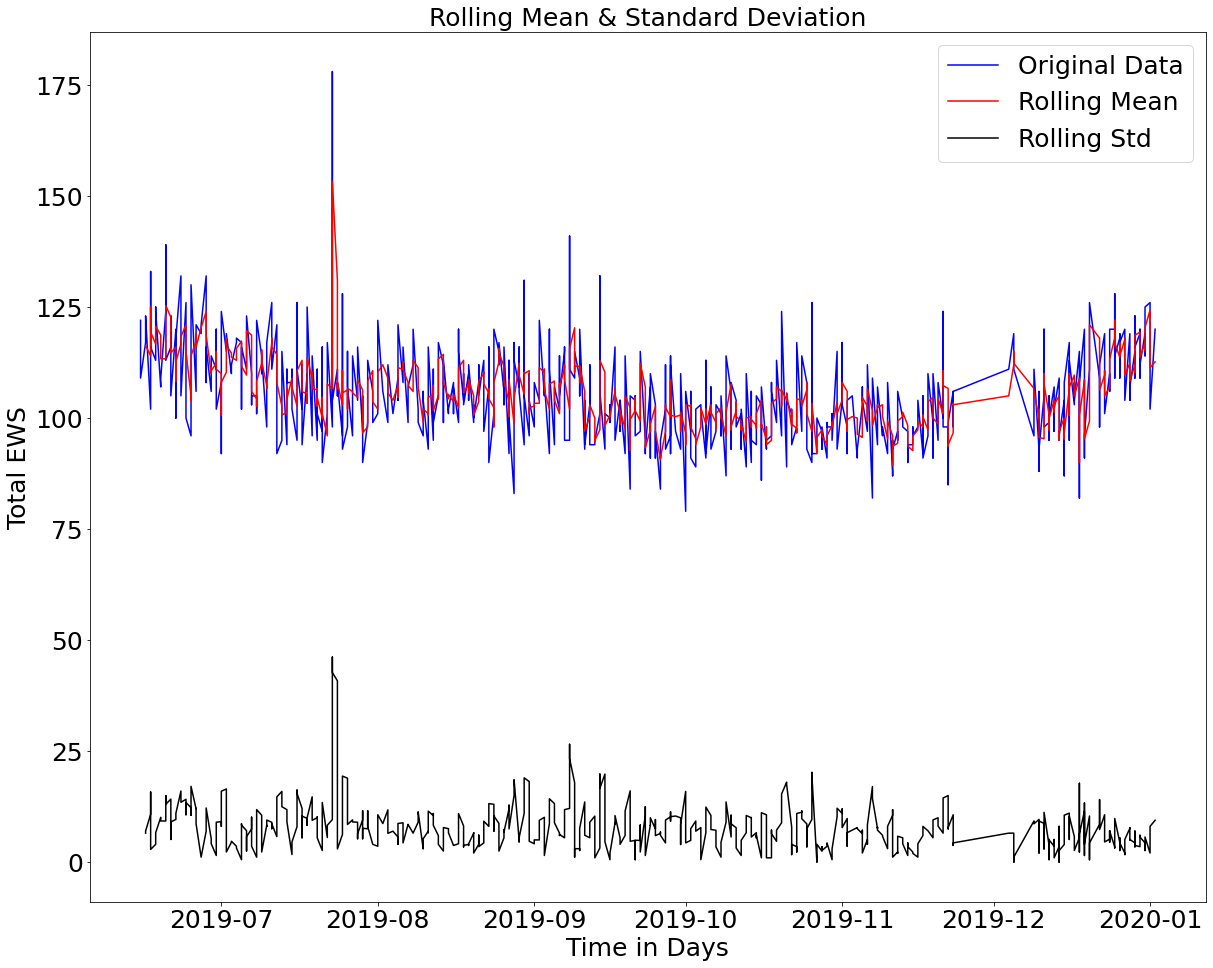

In [61]:
TestStationaryPlot(df[df['PatientId']==1743]['SBP'])

In [62]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
def TestStationaryAdfuller(ts):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(ts['EWS_Total'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [63]:
TestStationaryAdfuller(df[df['PatientId']==1743])

Results of Dickey Fuller Test:
Test Statistic                  -3.434768
p-value                          0.009829
#Lags Used                      12.000000
Number of Observations Used    603.000000
Critical Value (1%)             -3.441241
Critical Value (5%)             -2.866345
Critical Value (10%)            -2.569329
dtype: float64


In [64]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

In [65]:
#df.drop(['LOC','Add_O2','EwsProcedure'],axis=1,inplace=True)

In [66]:
df.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
yyyymmdd,,,,,,,,,,,,,,,,,,
2019-05-01,29,2019-05-01 13:27:50,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
2019-05-01,31,2019-05-01 15:54:27,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
2019-05-01,33,2019-05-01 17:03:16,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
2019-05-01,32,2019-05-01 21:08:05,NEWS2,0,125.0,0.0,ALERT,0,97.0,0.0,False,0.0,87,0,14,0,37.1,0
2019-05-01,34,2019-05-01 21:13:21,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,64,0,13,0,36.6,0


In [67]:
#df.drop('ObservationDate',axis=1,inplace=True)

In [99]:
deco = seasonal_decompose(df[df['PatientId']==1743].SpO2,period=2)

In [100]:
trend = deco.trend

In [101]:
residual = deco.resid

In [102]:
seasonal = deco.seasonal

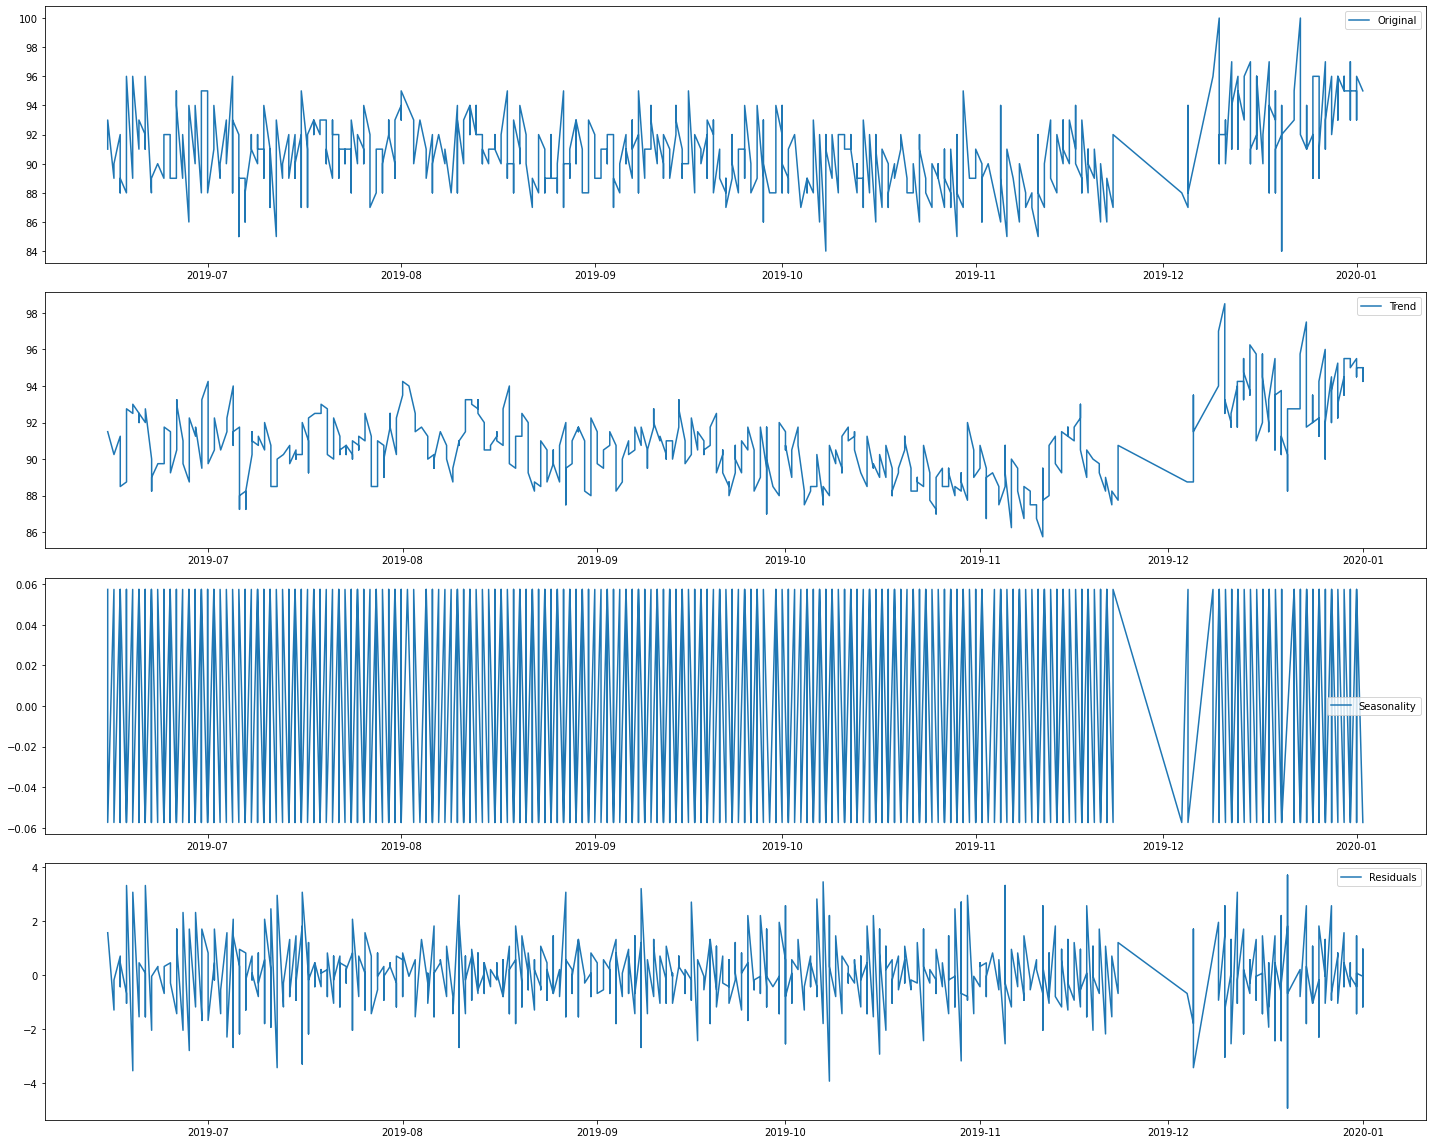

In [104]:
plt.subplot(411)
plt.plot(df[df['PatientId']==1743].SpO2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [31]:
ews = pd.DataFrame(df[['ObservationDate','EWS_Total','PatientId']])

In [32]:
ews.columns = ['ds','y','PatientId']

In [33]:
ews.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160947 entries, 2019-05-01 to 2020-01-02
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ds         160947 non-null  datetime64[ns]
 1   y          160947 non-null  int64         
 2   PatientId  160947 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.9 MB


In [34]:
ews['yyyymmdd'] = ews['ds'].dt.strftime('%Y-%m-%d')

In [35]:
ews.drop('ds',axis=1)

,y,PatientId,yyyymmdd
yyyymmdd,,,
2019-05-01,0,29,2019-05-01
2019-05-01,1,31,2019-05-01
2019-05-01,0,33,2019-05-01
2019-05-01,0,32,2019-05-01
2019-05-01,1,34,2019-05-01
...,...,...,...
2020-01-02,3,20278,2020-01-02
2020-01-02,3,20480,2020-01-02
2020-01-02,0,2499,2020-01-02


In [36]:
ews.drop('ds',axis=1,inplace=True)

In [37]:
ews.columns=['y','PatientId','ds']

In [38]:
cols = ['ds']  + [col for col in ews if col != 'ds']
ews = ews[cols]

In [39]:
ews.head()

,ds,y,PatientId
yyyymmdd,,,
2019-05-01,2019-05-01,0,29
2019-05-01,2019-05-01,1,31
2019-05-01,2019-05-01,0,33
2019-05-01,2019-05-01,0,32
2019-05-01,2019-05-01,1,34


In [40]:
model = Prophet()

In [41]:
model.fit(ews[ews['PatientId']==1743])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01 -10.724151  -15.975301   -5.922676
1 2021-02-01 -12.754474  -18.792656   -7.459565
2 2021-03-01 -13.854842  -20.229604   -7.979443
3 2021-04-01 -14.624309  -21.768369   -8.155584
4 2021-05-01 -16.005127  -23.995552   -8.836511


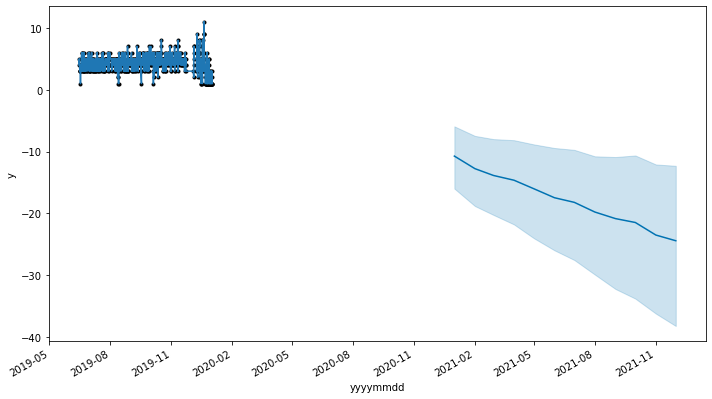

In [42]:
import matplotlib
future = list()
for i in range(1, 13):
    date = '2021-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
ews[ews['PatientId']==1743]['y'].plot()
plt.show()